## Lab - EDA Bivariate Analysis: Diving into Amazon UK Product Insights Part II

**Objective**: Delve into the dynamics of product pricing on Amazon UK to uncover insights that can inform business strategies and decision-making.

**Dataset**: This lab utilizes the [Amazon UK product dataset](https://www.kaggle.com/datasets/asaniczka/uk-optimal-product-price-prediction/)
which provides information on product categories, brands, prices, ratings, and more from from Amazon UK. You'll need to download it to start working with it.

---


### Part 1: Analyzing Best-Seller Trends Across Product Categories

**Objective**: Understand the relationship between product categories and their best-seller status.

1. **Crosstab Analysis**:
    - Create a crosstab between the product `category` and the `isBestSeller` status.
    
    - Are there categories where being a best-seller is more prevalent? 
    	
    	*Hint: one option is to calculate the proportion of best-sellers for each category and then sort the categories based on this proportion in descending order.*


2. **Statistical Tests**:
    - Conduct a Chi-square test to determine if the best-seller distribution is independent of the product category.
    - Compute Cramér's V to understand the strength of association between best-seller status and category.

3. **Visualizations**:
	- Visualize the relationship between product categories and the best-seller status using a stacked bar chart.

---

In [187]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

%matplotlib inline

In [188]:
csv = '/Users/catherinewu/Downloads/amz_uk_price_prediction_dataset.csv'

df_amz = pd.read_csv(csv)
df_amz

,uid,asin,title,stars,reviews,price,isBestSeller,boughtInLastMonth,category
0,1,B09B96TG33,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
1,2,B01HTH3C8S,"Anker Soundcore mini, Super-Portable Bluetooth...",4.7,98099,23.99,True,0,Hi-Fi Speakers
2,3,B09B8YWXDF,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
3,4,B09B8T5VGV,"Echo Dot with clock (5th generation, 2022 rele...",4.7,7205,31.99,False,0,Hi-Fi Speakers
4,5,B09WX6QD65,Introducing Echo Pop | Full sound compact Wi-F...,4.6,1881,17.99,False,0,Hi-Fi Speakers
...,...,...,...,...,...,...,...,...,...
2443646,2828589,B0CHSD7P2Q,"Motorbike Armour, Motorbike Clothing, Cycling ...",0.0,0,22.34,False,0,Motorbike Clothing
2443647,2828590,B0B7B8FNBQ,PROFIRST Waterproof Motorcycle 2 Piece Ladies ...,0.0,0,97.99,False,0,Motorbike Clothing
2443648,2828591,B0BD5FL5FB,Men’s Motorcycle Motorbike Biker Trousers Kevl...,0.0,0,52.99,False,0,Motorbike Clothing
2443649,2828592,B008OYLL4I,Texpeed Mens Motorcycle Motorbike Biker Trouse...,4.3,404,79.99,False,0,Motorbike Clothing


In [189]:
df_amz.drop("uid", inplace=True, axis=1)


In [339]:
potential_categorical_from_numerical = df_amz.select_dtypes("number").loc[:, df_amz.select_dtypes("number").nunique() < 20]
potential_categorical_from_numerical

""
0
1
2
3
4
...
2443646
2443647
2443648
2443649


In [341]:
df_numerical = df_amz.select_dtypes("number").drop(columns=potential_categorical_from_numerical.columns)
df_numerical

,stars,reviews,price,boughtInLastMonth
0,4.7,15308,21.99,0
1,4.7,98099,23.99,0
2,4.7,15308,21.99,0
3,4.7,7205,31.99,0
4,4.6,1881,17.99,0
...,...,...,...,...
2443646,0.0,0,22.34,0
2443647,0.0,0,97.99,0
2443648,0.0,0,52.99,0
2443649,4.3,404,79.99,0


In [192]:
df_categorical = df_amz.select_dtypes("object")
df_categorical

,asin,title,category
0,B09B96TG33,"Echo Dot (5th generation, 2022 release) | Big ...",Hi-Fi Speakers
1,B01HTH3C8S,"Anker Soundcore mini, Super-Portable Bluetooth...",Hi-Fi Speakers
2,B09B8YWXDF,"Echo Dot (5th generation, 2022 release) | Big ...",Hi-Fi Speakers
3,B09B8T5VGV,"Echo Dot with clock (5th generation, 2022 rele...",Hi-Fi Speakers
4,B09WX6QD65,Introducing Echo Pop | Full sound compact Wi-F...,Hi-Fi Speakers
...,...,...,...
2443646,B0CHSD7P2Q,"Motorbike Armour, Motorbike Clothing, Cycling ...",Motorbike Clothing
2443647,B0B7B8FNBQ,PROFIRST Waterproof Motorcycle 2 Piece Ladies ...,Motorbike Clothing
2443648,B0BD5FL5FB,Men’s Motorcycle Motorbike Biker Trousers Kevl...,Motorbike Clothing
2443649,B008OYLL4I,Texpeed Mens Motorcycle Motorbike Biker Trouse...,Motorbike Clothing


In [193]:
df = pd.crosstab(df_amz['category'], df_amz['isBestSeller'])
df

isBestSeller,False,True
category,,
3D Printers,247,1
3D Printing & Scanning,4065,2
Abrasive & Finishing Products,245,5
Action Cameras,1696,1
Adapters,251,3
...,...,...
Wind Instruments,243,7
Window Treatments,234,5
Women,17559,213


In [194]:
df2 = df.head(20)
df2

isBestSeller,False,True
category,,
3D Printers,247,1
3D Printing & Scanning,4065,2
Abrasive & Finishing Products,245,5
Action Cameras,1696,1
Adapters,251,3
Agricultural Equipment & Supplies,8421,109
Alexa Built-In Devices,106,1
Art & Craft Supplies,253,5
Arts & Crafts,9319,230


In [195]:
df1 = pd.crosstab(df_amz['category'], df_amz['isBestSeller'])
df1['BestSeller (%)'] = (df[True] / df.sum(axis=1)).round(3)
df1

isBestSeller,False,True,BestSeller (%)
category,,,
3D Printers,247,1,0.004
3D Printing & Scanning,4065,2,0.000
Abrasive & Finishing Products,245,5,0.020
Action Cameras,1696,1,0.001
Adapters,251,3,0.012
...,...,...,...
Wind Instruments,243,7,0.028
Window Treatments,234,5,0.021
Women,17559,213,0.012


In [207]:
df3 = df1.sort_values(by='BestSeller (%)', ascending=False)
df3

isBestSeller,False,True,BestSeller (%)
category,,,
Health & Personal Care,9017,552,0.058
Grocery,9008,556,0.058
Smart Home Security & Lighting,98,6,0.058
Mobile Phone Accessories,248,11,0.042
Power & Hand Tools,8353,306,0.035
...,...,...,...
Equestrian Sports Boots,2360,1,0.000
Radio Communication,5206,2,0.000
Projectors,8698,0,0.000


In [211]:
from scipy.stats import chi2_contingency

chi2_statistic, chi2_p_value, _, _ = chi2_contingency(df)

chi2_statistic, chi2_p_value

(36540.20270061387, 0.0)

In [213]:
from scipy.stats.contingency import association

# Computing the association between variables in 'crosstab_result' using the "cramer" method
association(df, method="cramer")

0.1222829439760564

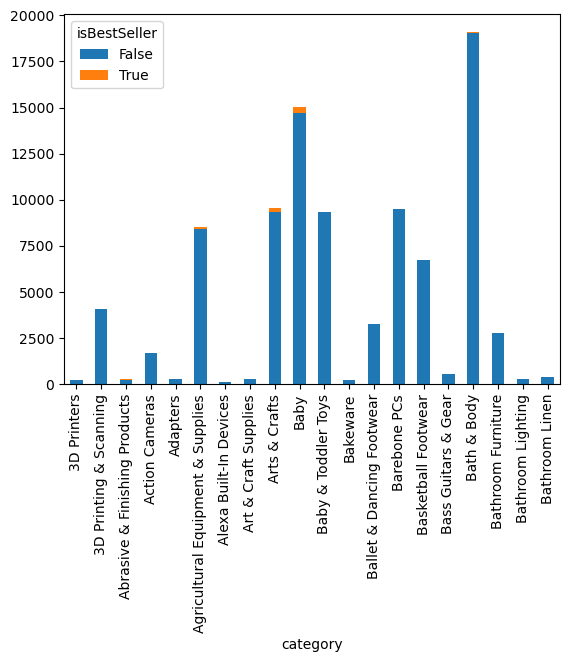

In [215]:
# Plotting a stacked bar chart for the 'crosstab_result' data
df2.plot(kind="bar", stacked=True)
plt.show()

### Part 2: Exploring Product Prices and Ratings Across Categories and Brands

**Objective**: Investigate how different product categories influence product prices.

0. **Preliminary Step: Remove outliers in product prices.**

	For this purpose, we can use the IQR (Interquartile Range) method. Products priced below the first quartile minus 1.5 times the IQR or above the third quartile plus 1.5 times the IQR will be considered outliers and removed from the dataset. The next steps will be done with the dataframe without outliers.
	
	*Hint: you can check the last Check For Understanding at the end of the lesson EDA Bivariate Analysis for a hint on how to do this.*

1. **Violin Plots**:
    - Use a violin plot to visualize the distribution of `price` across different product `categories`. Filter out the top 20 categories based on count for better visualization.
    - Which product category tends to have the highest median price? Don't filter here by top categories.

2. **Bar Charts**:
    - Create a bar chart comparing the average price of products for the top 10 product categories (based on count).
    - Which product category commands the highest average price? Don't filter here by top categories.

3. **Box Plots**:
    - Visualize the distribution of product `ratings` based on their `category` using side-by-side box plots. Filter out the top 10 categories based on count for better visualization.
    - Which category tends to receive the highest median rating from customers? Don't filter here by top categories.


In [217]:
values = df_amz['price'].dropna()

# Calculate Q1 (25th percentile) and Q3 (75th percentile)
Q1 = values.quantile(0.25)
Q3 = values.quantile(0.75)
IQR = Q3 - Q1
    
# Define bounds for the outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
    
# Identify the outliers
outliers = values[(values < lower_bound) | (values > upper_bound)]
    
print(lower_bound)
print(upper_bound)
print("Outliers in 'square_meters':")
print(outliers)

-44.01
99.99000000000001
Outliers in 'square_meters':
10         139.00
19         164.99
25         149.99
28         289.00
31         199.99
            ...  
2443619    166.99
2443627    152.58
2443638    108.77
2443641    166.99
2443643    158.99
Name: price, Length: 327688, dtype: float64


In [265]:
df4 = df_amz[df_amz['price'] >= lower_bound]
df4 = df_amz[df_amz['price'] <= upper_bound]
df4

,asin,title,stars,reviews,price,isBestSeller,boughtInLastMonth,category
0,B09B96TG33,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
1,B01HTH3C8S,"Anker Soundcore mini, Super-Portable Bluetooth...",4.7,98099,23.99,True,0,Hi-Fi Speakers
2,B09B8YWXDF,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
3,B09B8T5VGV,"Echo Dot with clock (5th generation, 2022 rele...",4.7,7205,31.99,False,0,Hi-Fi Speakers
4,B09WX6QD65,Introducing Echo Pop | Full sound compact Wi-F...,4.6,1881,17.99,False,0,Hi-Fi Speakers
...,...,...,...,...,...,...,...,...
2443646,B0CHSD7P2Q,"Motorbike Armour, Motorbike Clothing, Cycling ...",0.0,0,22.34,False,0,Motorbike Clothing
2443647,B0B7B8FNBQ,PROFIRST Waterproof Motorcycle 2 Piece Ladies ...,0.0,0,97.99,False,0,Motorbike Clothing
2443648,B0BD5FL5FB,Men’s Motorcycle Motorbike Biker Trousers Kevl...,0.0,0,52.99,False,0,Motorbike Clothing
2443649,B008OYLL4I,Texpeed Mens Motorcycle Motorbike Biker Trouse...,4.3,404,79.99,False,0,Motorbike Clothing


In [295]:
# Step 1: Count occurrences of each category in the 'category' column
category_counts = df4['category'].value_counts().sort_values(ascending=False)

# Step 2: Get the top 20 categories by count
top_20_categories = category_counts.head(20).index

# Step 3: Filter the original DataFrame to only include rows with these top 20 categories
df_top20 = df4[df4['category'].isin(top_20_categories)]

# Step 4: Display the filtered DataFrame
print(df_top20)


               asin                                              title  stars  \
19513    B09477KHQ3  Personalised Birthday Print Gift "THE YEAR YOU...    4.5   
19514    B0BSRFQYG8  Wax Melts 4 Bars | Build Your Own Box (Choose ...    3.9   
19515    B09N9GVHV9  Personalised Birthday Print Gift "ON THE DAY/Y...    4.6   
19516    B0BRYGV7PQ  Fresh Wax Melts - Laundry Type Wax Melts - Str...    4.5   
19517    B0B1JHB28R  Manta Makes Work Leaving Gifts | I Used to Wor...    4.7   
...             ...                                                ...    ...   
2429088  B0045I6SHW    Cannondale Men's Bibshort Dart Team Bike Shorts    0.0   
2429089  B0045I6NZY         Cannondale Men's Baggy Fitness Bike Shorts    0.0   
2429090  B003BLON3A             Pearl iZUMi Men's Phase Splice Knicker    4.3   
2437153  B091HG57TP  Goodstoworld Boys Girls Tracksuit Bottoms 3D S...    4.2   
2437154  B09F8TFQDM  AIEOE Unisex Baby Snow Trousers Boys Girls Dow...    5.0   

         reviews  price  is

/var/folders/s6/0v7n1v2x6j33b91n4fvvkdr00000gn/T/ipykernel_60936/818884927.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df_top20, x='category', y='price', palette="coolwarm")


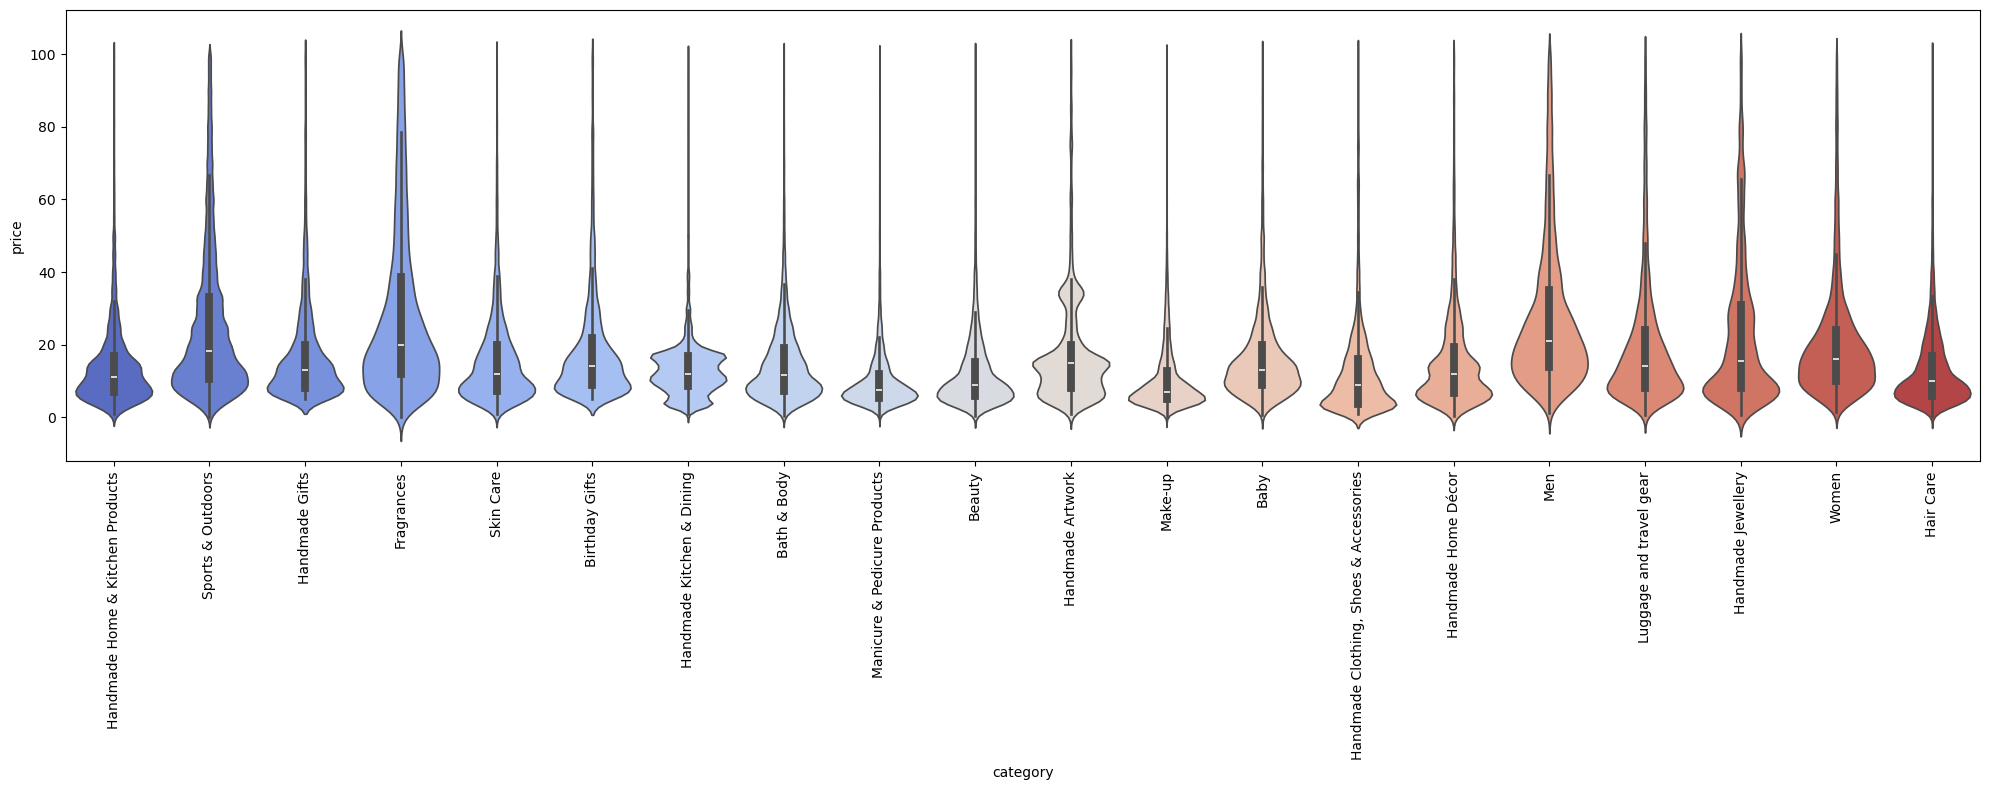

In [289]:
# Plotting a violin plot to visualize the distribution 
plt.figure(figsize=(20,8))
sns.violinplot(data=df_top20, x='category', y='price', palette="coolwarm")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()




In [ ]:
#fragrances and men have the highest median price

In [297]:
# Step 1: Count occurrences of each category in the 'category' column
category_counts = df4['category'].value_counts().sort_values(ascending=False)

# Step 2: Get the top 20 categories by count
top_10 = category_counts.head(10).index

# Step 3: Filter the original DataFrame to only include rows with these top 20 categories
df_top10 = df4[df4['category'].isin(top_10)]

# Step 4: Display the filtered DataFrame
print(df_top10)

               asin                                              title  stars  \
82163    B07DLGZ828  Neutrade GoPro 3M Sticky Pads Double Sided Adh...    4.2   
82164    B09HGZHXJT  WOLFANG Action Camera 4K 20MP GA100, Waterproo...    4.2   
82167    B08LD4VXGL  FitStill 60M/196FT Waterproof Case for Go Pro ...    4.5   
82168    B07QDMLMJH  Nextbase Powered Mount Variations For Cameras ...    4.7   
82169    B09TQMCNY7  WOLFANG Action Camera GA100 with 64GB microSDX...    4.2   
...             ...                                                ...    ...   
2429088  B0045I6SHW    Cannondale Men's Bibshort Dart Team Bike Shorts    0.0   
2429089  B0045I6NZY         Cannondale Men's Baggy Fitness Bike Shorts    0.0   
2429090  B003BLON3A             Pearl iZUMi Men's Phase Splice Knicker    4.3   
2437153  B091HG57TP  Goodstoworld Boys Girls Tracksuit Bottoms 3D S...    4.2   
2437154  B09F8TFQDM  AIEOE Unisex Baby Snow Trousers Boys Girls Dow...    5.0   

         reviews  price  is

/var/folders/s6/0v7n1v2x6j33b91n4fvvkdr00000gn/T/ipykernel_60936/3265260234.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_top10, x='category', y='price', palette="coolwarm", errorbar= None)


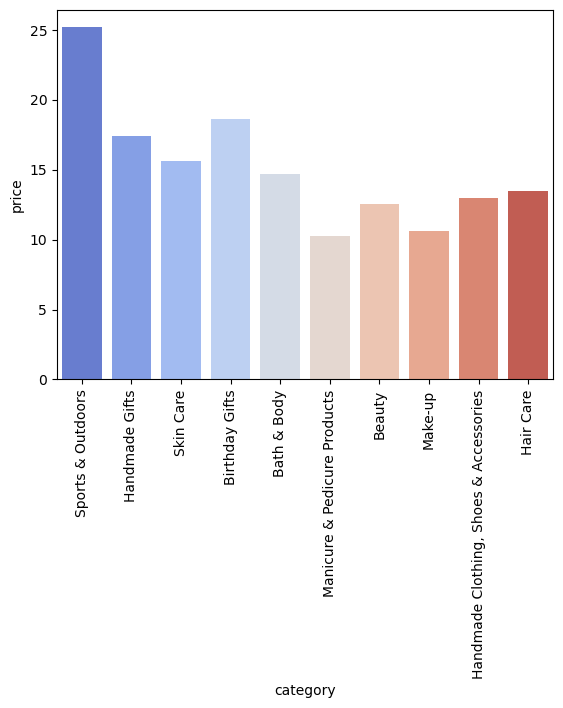

In [308]:
sns.barplot(data=df_top10, x='category', y='price', palette="coolwarm", errorbar= None)
plt.xticks(rotation=90)
plt.show()

In [ ]:
#sport and outdoors has the highest average price 

In [316]:
df_stars = df_top10[df_top10['stars'] != 0]

/var/folders/s6/0v7n1v2x6j33b91n4fvvkdr00000gn/T/ipykernel_60936/726059502.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_stars, x='category', y='stars', palette="coolwarm")


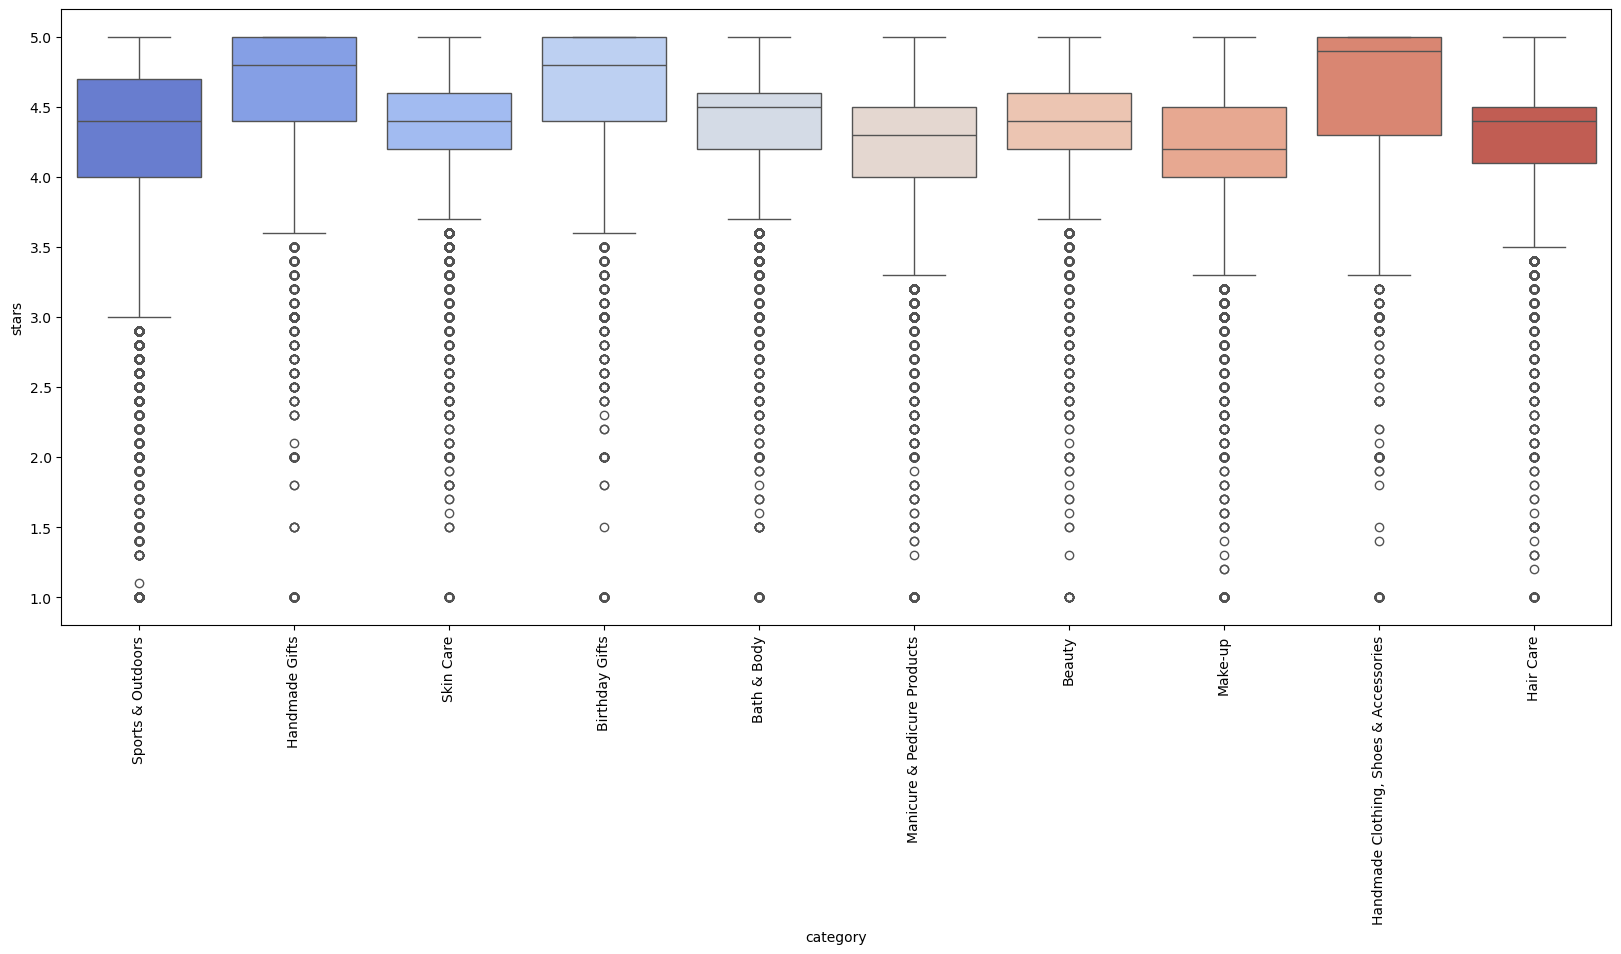

In [322]:
plt.figure(figsize=(20,8))
sns.boxplot(data=df_stars, x='category', y='stars', palette="coolwarm")
plt.xticks(rotation=90)
plt.show()


### Part 3: Investigating the Interplay Between Product Prices and Ratings

**Objective**: Analyze how product ratings (`stars`) correlate with product prices.

1. **Correlation Coefficients**:
    - Calculate the correlation coefficient between `price` and `stars`.
    - Is there a significant correlation between product price and its rating?
	
2. **Visualizations**:
    - Use a scatter plot to visualize the relationship between product rating and price. What patterns can you observe?
    - Use a correlation heatmap to visualize correlations between all numerical variables.
    - Examine if product prices typically follow a normal distribution using a QQ plot. 

---

In [324]:
df_allstars = df4[df4['stars'] != 0]

In [328]:
correlation = df_allstars['price'].corr(df_allstars['stars'])
correlation

0.006744508067157907

In [330]:
correlation = df_allstars['price'].corr(df_allstars['stars'], method='spearman')
correlation

0.024659617205380468

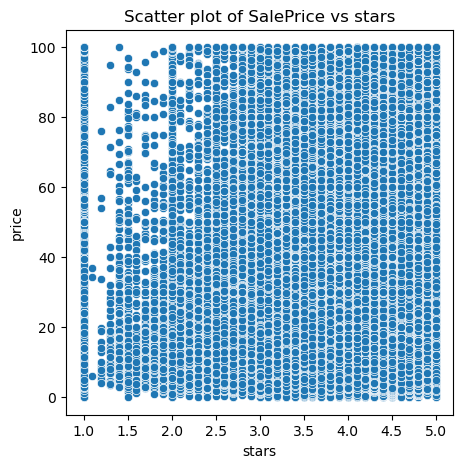

In [337]:
plt.figure(figsize=(5, 5))
plt.title('Scatter plot of SalePrice vs ' + 'stars')
sns.scatterplot(data=df_allstars, x='stars', y='price')
plt.show()

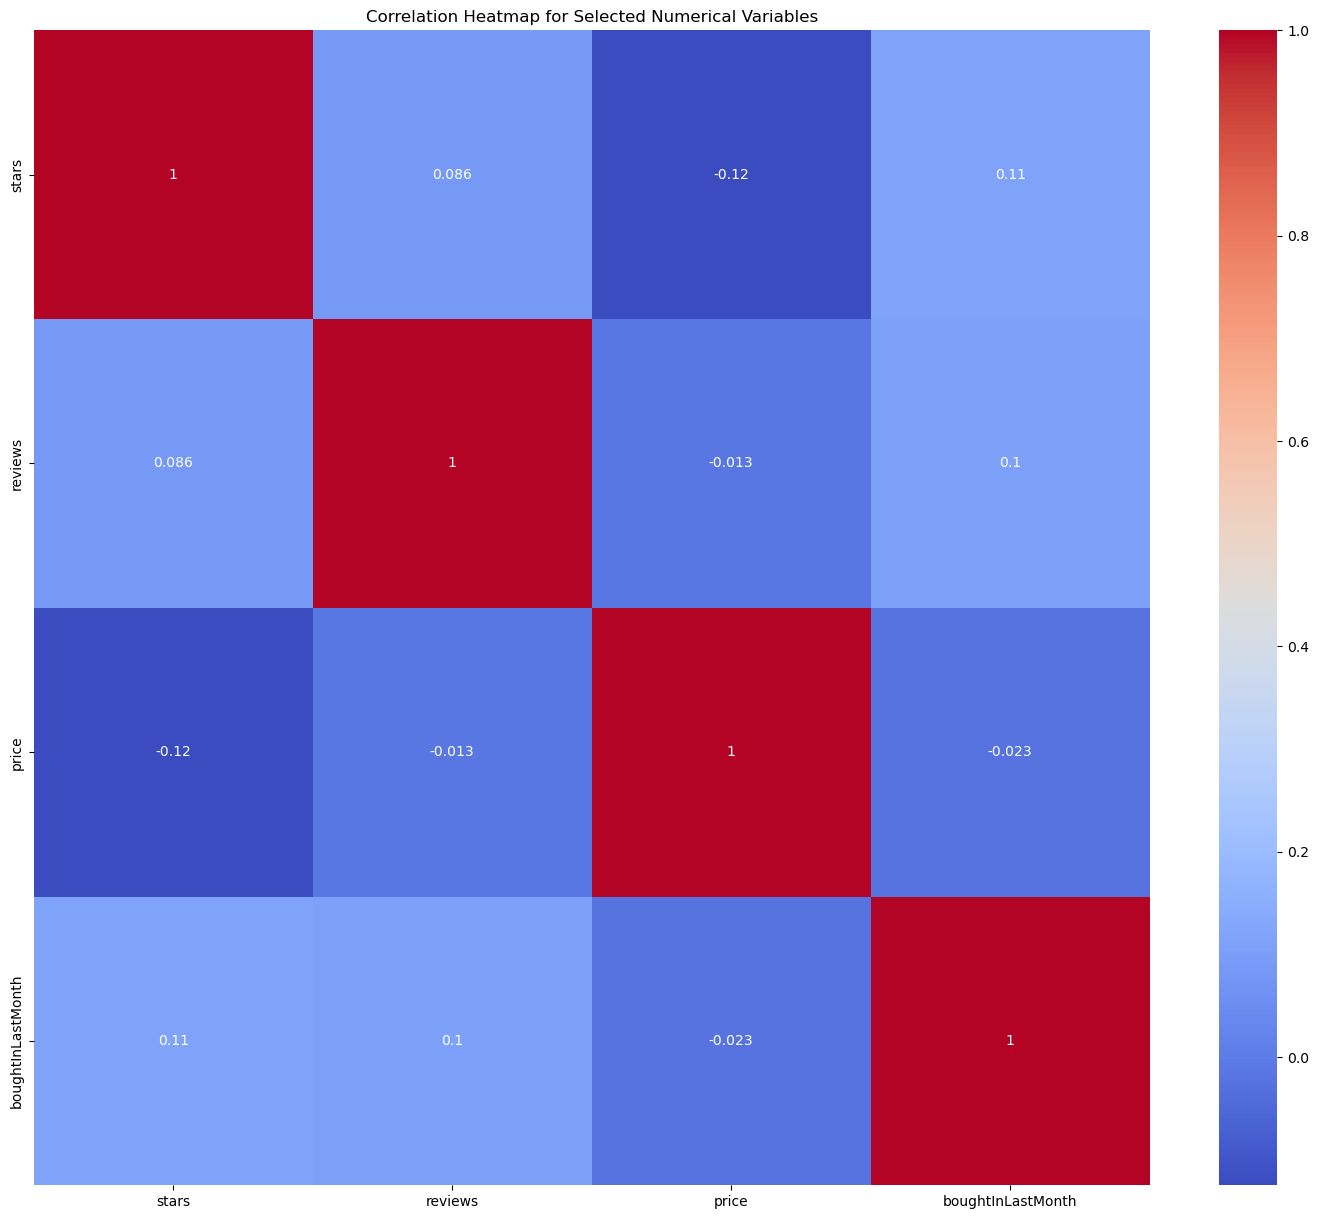

In [343]:
correlation_matrix = df_numerical.corr()

# Setting up the matplotlib figure with an appropriate size
plt.figure(figsize=(18, 15))

# Drawing the heatmap for the numerical columns
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")

plt.title("Correlation Heatmap for Selected Numerical Variables")
plt.show()